#                   BigMac Fiyat Değişim Analizi

Kaggle'dan çektiğim ülkelere göre bigmacin fiyat değişimi ve ülkelerin gelir ortalaması verilerini analiz ettim.

In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [3]:
df =  pd.read_csv('BigmacPrice.csv')

In [4]:
#veri setinden Türkiye verilerini çekerek yeni bir data frame elde ediyorum.
df2 = df.loc[df['name'] == 'Turkey']

In [5]:
df2

,date,currency_code,name,local_price,dollar_ex,dollar_price
86,2002-04-01,TRY,Turkey,4000000.00,1.324500e+06,3.020008
117,2003-04-01,TRY,Turkey,3750000.00,1.600500e+06,2.343018
154,2004-05-01,TRY,Turkey,3950000.00,1.531000e+06,2.580013
193,2005-06-01,TRY,Turkey,4.00,1.369000e+00,2.921841
227,2006-01-01,TRY,Turkey,4.10,1.336500e+00,3.067714
264,2006-05-01,TRY,Turkey,4.20,1.541500e+00,2.724619
304,2007-01-01,TRY,Turkey,4.55,1.409750e+00,3.227523
344,2007-06-01,TRY,Turkey,4.75,1.298100e+00,3.659194
384,2008-06-01,TRY,Turkey,5.15,1.192750e+00,4.317753
425,2009-07-01,TRY,Turkey,5.65,1.550050e+00,3.645044


Görüldüğü üzere 2002-2020 arası veriler bulunuyor. 2002-2004 yılları arasında henğz YTL'ye geçilmediği için grafiğe yansıttığımız zaman aykırı değer olarak göreceğiz. Bu yüzden 6 sıfırı atıp YTL haline getiriyorum. Aynı zamanda dolar karşılığını da düzenliyorum. Bunun için data framei ikiye bölerek, istediğim sütunlarda bölme işlemi yapacağım ve daha sonra tekrar birleştiriyorum.

In [6]:
#Data frame'i YTL'den öncesi ve sonrası olarak ikiye ayırıyorum..

df_temp1= df2.iloc[3:,:]
df_temp2 = df2.iloc[:3,:]

In [7]:
df_temp1

,date,currency_code,name,local_price,dollar_ex,dollar_price
193,2005-06-01,TRY,Turkey,4.00,1.36900,2.921841
227,2006-01-01,TRY,Turkey,4.10,1.33650,3.067714
264,2006-05-01,TRY,Turkey,4.20,1.54150,2.724619
304,2007-01-01,TRY,Turkey,4.55,1.40975,3.227523
344,2007-06-01,TRY,Turkey,4.75,1.29810,3.659194
384,2008-06-01,TRY,Turkey,5.15,1.19275,4.317753
425,2009-07-01,TRY,Turkey,5.65,1.55005,3.645044
466,2010-01-01,TRY,Turkey,5.65,1.47455,3.831677
507,2010-07-01,TRY,Turkey,5.95,1.52930,3.890669
549,2011-07-01,TRY,Turkey,6.50,1.72285,3.772818


In [8]:
df_temp2

,date,currency_code,name,local_price,dollar_ex,dollar_price
86,2002-04-01,TRY,Turkey,4000000.0,1324500.0,3.020008
117,2003-04-01,TRY,Turkey,3750000.0,1600500.0,2.343018
154,2004-05-01,TRY,Turkey,3950000.0,1531000.0,2.580013


In [9]:
#YTL'den öncesini YTL haline getiriyorum.

df_temp2['local_price'] = df_temp2['local_price'].div(1000000)

<ipython-input-9-6bac250267ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp2['local_price'] = df_temp2['local_price'].div(1000000)


In [10]:
#Dolar karşılığını da düzenliyorum.
df_temp2['dollar_ex'] = df_temp2['dollar_ex'].div(1000000)

<ipython-input-10-bbb2eef2bed2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp2['dollar_ex'] = df_temp2['dollar_ex'].div(1000000)


In [11]:
#son hali:
df_temp2

,date,currency_code,name,local_price,dollar_ex,dollar_price
86,2002-04-01,TRY,Turkey,4.00,1.3245,3.020008
117,2003-04-01,TRY,Turkey,3.75,1.6005,2.343018
154,2004-05-01,TRY,Turkey,3.95,1.5310,2.580013


In [12]:
#veri setlerini birleştirelim ekleyelim.
df_bm = pd.concat([df_temp2, df_temp1])

In [13]:
#Veri setinin son hali:
df_bm

,date,currency_code,name,local_price,dollar_ex,dollar_price
86,2002-04-01,TRY,Turkey,4.00,1.32450,3.020008
117,2003-04-01,TRY,Turkey,3.75,1.60050,2.343018
154,2004-05-01,TRY,Turkey,3.95,1.53100,2.580013
193,2005-06-01,TRY,Turkey,4.00,1.36900,2.921841
227,2006-01-01,TRY,Turkey,4.10,1.33650,3.067714
264,2006-05-01,TRY,Turkey,4.20,1.54150,2.724619
304,2007-01-01,TRY,Turkey,4.55,1.40975,3.227523
344,2007-06-01,TRY,Turkey,4.75,1.29810,3.659194
384,2008-06-01,TRY,Turkey,5.15,1.19275,4.317753
425,2009-07-01,TRY,Turkey,5.65,1.55005,3.645044


In [14]:
#ortalama gelir ile karşılaştırmak istediğim için tarihi sadece yıl formatına çeviriyorum.
df_bm['TIME'] = pd.to_datetime(df['date']).dt.year


In [15]:
df_bm

,date,currency_code,name,local_price,dollar_ex,dollar_price,TIME
86,2002-04-01,TRY,Turkey,4.00,1.32450,3.020008,2002
117,2003-04-01,TRY,Turkey,3.75,1.60050,2.343018,2003
154,2004-05-01,TRY,Turkey,3.95,1.53100,2.580013,2004
193,2005-06-01,TRY,Turkey,4.00,1.36900,2.921841,2005
227,2006-01-01,TRY,Turkey,4.10,1.33650,3.067714,2006
264,2006-05-01,TRY,Turkey,4.20,1.54150,2.724619,2006
304,2007-01-01,TRY,Turkey,4.55,1.40975,3.227523,2007
344,2007-06-01,TRY,Turkey,4.75,1.29810,3.659194,2007
384,2008-06-01,TRY,Turkey,5.15,1.19275,4.317753,2008
425,2009-07-01,TRY,Turkey,5.65,1.55005,3.645044,2009


In [16]:
df_bm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 86 to 1324
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30 non-null     object 
 1   currency_code  30 non-null     object 
 2   name           30 non-null     object 
 3   local_price    30 non-null     float64
 4   dollar_ex      30 non-null     float64
 5   dollar_price   30 non-null     float64
 6   TIME           30 non-null     int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 1.9+ KB


In [17]:
#boş veri olmadığını görüyoruz fakat yine de kontrol edelim.
df2.isnull().sum()

date             0
currency_code    0
name             0
local_price      0
dollar_ex        0
dollar_price     0
dtype: int64

In [18]:
#istatiksel özetine bakalım.

df_bm.describe()

,local_price,dollar_ex,dollar_price,TIME
count,30.000000,30.000000,30.000000,30.000000
mean,7.766000,2.488757,3.355182,2011.866667
std,3.021118,1.400374,0.753684,5.230767
min,3.750000,1.192750,1.996879,2002.000000
25%,4.850000,1.529725,2.768167,2007.250000
50%,8.350000,1.844925,3.469204,2012.500000
75%,10.625000,3.034687,3.863578,2016.000000
max,13.990000,5.880250,4.777385,2020.000000


In [49]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_bm['TIME'],
    y=df_bm['local_price'],
    name='Turkish Lira',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=df_bm['TIME'],
    y=df_bm['dollar_price'],
    name='Dollar',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

Grafikte görüldüğü üzere yıllara göre dolar fiyatında azalmalar olmasına rağmen TL'nin değer kaybına bağlı olarak ürünün fiyatı artış göstermektedir.

In [20]:
#Ortalama GelirVeri Setini dahil ediyorum.

df3 =  pd.read_csv('avg_wage.csv')
df3

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,AVWAGE,TOT,USD,A,1990,40519.083621,NaN
1,AUS,AVWAGE,TOT,USD,A,1991,40328.934866,NaN
2,AUS,AVWAGE,TOT,USD,A,1992,41135.798085,NaN
3,AUS,AVWAGE,TOT,USD,A,1993,41513.545516,NaN
4,AUS,AVWAGE,TOT,USD,A,1994,41789.766398,NaN
...,...,...,...,...,...,...,...,...
1074,TUR,AVWAGE,TOT,USD,A,2016,30653.260715,NaN
1075,TUR,AVWAGE,TOT,USD,A,2017,30076.378939,NaN
1076,TUR,AVWAGE,TOT,USD,A,2018,30610.715156,NaN
1077,TUR,AVWAGE,TOT,USD,A,2019,32625.050808,NaN


In [21]:
#Sadece Türkiye'nin değerlerini alıyorum.

df_aw = df3.loc[df3['LOCATION'] == 'TUR']
df_aw

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
1064,TUR,AVWAGE,TOT,USD,A,2006,21839.962867,NaN
1065,TUR,AVWAGE,TOT,USD,A,2007,22590.984710,NaN
1066,TUR,AVWAGE,TOT,USD,A,2008,22467.875809,NaN
1067,TUR,AVWAGE,TOT,USD,A,2009,22722.973353,NaN
1068,TUR,AVWAGE,TOT,USD,A,2010,23291.586868,NaN
1069,TUR,AVWAGE,TOT,USD,A,2011,23666.754874,NaN
1070,TUR,AVWAGE,TOT,USD,A,2012,24617.577418,NaN
1071,TUR,AVWAGE,TOT,USD,A,2013,25748.979474,NaN
1072,TUR,AVWAGE,TOT,USD,A,2014,26631.201686,NaN
1073,TUR,AVWAGE,TOT,USD,A,2015,27308.102961,NaN


In [22]:
#yıllara göre yıllık gelir değişimine bakalım.
fig = px.bar(data_frame = df_aw,
             x='TIME',
             y='Value',)
fig.show()

In [23]:
#bigmac fiyatları ve yıllık ortalama geliri birleştiriyorum.

df_co = df_bm.merge(df_aw, on='TIME')
df_co.head()

,date,currency_code,name,local_price,dollar_ex,dollar_price,TIME,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes
0,2006-01-01,TRY,Turkey,4.10,1.33650,3.067714,2006,TUR,AVWAGE,TOT,USD,A,21839.962867,NaN
1,2006-05-01,TRY,Turkey,4.20,1.54150,2.724619,2006,TUR,AVWAGE,TOT,USD,A,21839.962867,NaN
2,2007-01-01,TRY,Turkey,4.55,1.40975,3.227523,2007,TUR,AVWAGE,TOT,USD,A,22590.984710,NaN
3,2007-06-01,TRY,Turkey,4.75,1.29810,3.659194,2007,TUR,AVWAGE,TOT,USD,A,22590.984710,NaN
4,2008-06-01,TRY,Turkey,5.15,1.19275,4.317753,2008,TUR,AVWAGE,TOT,USD,A,22467.875809,NaN


In [24]:
#bir yıl kaç bigmac alındığını yazalım.
df_co['piece'] = df_co['Value'].div(df_co['dollar_price'])
df_co

,date,currency_code,name,local_price,dollar_ex,dollar_price,TIME,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes,piece
0,2006-01-01,TRY,Turkey,4.10,1.33650,3.067714,2006,TUR,AVWAGE,TOT,USD,A,21839.962867,NaN,7119.295213
1,2006-05-01,TRY,Turkey,4.20,1.54150,2.724619,2006,TUR,AVWAGE,TOT,USD,A,21839.962867,NaN,8015.786371
2,2007-01-01,TRY,Turkey,4.55,1.40975,3.227523,2007,TUR,AVWAGE,TOT,USD,A,22590.984710,NaN,6999.481471
3,2007-06-01,TRY,Turkey,4.75,1.29810,3.659194,2007,TUR,AVWAGE,TOT,USD,A,22590.984710,NaN,6173.759421
4,2008-06-01,TRY,Turkey,5.15,1.19275,4.317753,2008,TUR,AVWAGE,TOT,USD,A,22467.875809,NaN,5203.603664
5,2009-07-01,TRY,Turkey,5.65,1.55005,3.645044,2009,TUR,AVWAGE,TOT,USD,A,22722.973353,NaN,6233.937141
6,2010-01-01,TRY,Turkey,5.65,1.47455,3.831677,2010,TUR,AVWAGE,TOT,USD,A,23291.586868,NaN,6078.691932
7,2010-07-01,TRY,Turkey,5.95,1.52930,3.890669,2010,TUR,AVWAGE,TOT,USD,A,23291.586868,NaN,5986.525008
8,2011-07-01,TRY,Turkey,6.50,1.72285,3.772818,2011,TUR,AVWAGE,TOT,USD,A,23666.754874,NaN,6272.964405
9,2012-01-01,TRY,Turkey,6.60,1.86295,3.542768,2012,TUR,AVWAGE,TOT,USD,A,24617.577418,NaN,6948.684220


In [50]:




fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_co['TIME'],
    y=df_co['piece'],
    
))
fig.show()

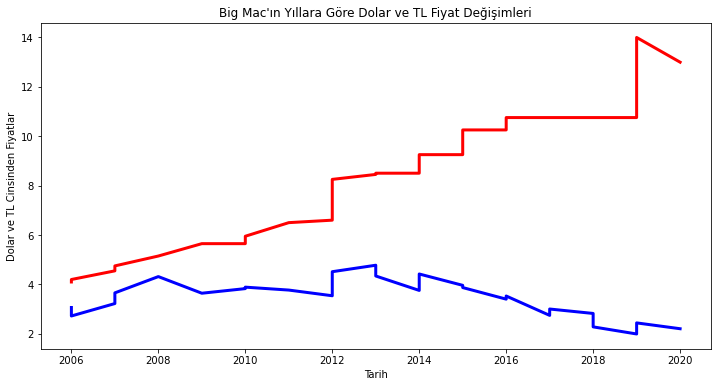

In [26]:

plt.figure(figsize=(12,6))

plt.plot(df_co.TIME,
         df_co.local_price,
         color="r",
         linewidth=3)

plt.plot(df_co.TIME,df_co.dollar_price,
         color="blue",
         linewidth=3,
         )

plt.xlabel("Tarih")

plt.ylabel("Dolar ve TL Cinsinden Fiyatlar")

plt.title("Big Mac'ın Yıllara Göre Dolar ve TL Fiyat Değişimleri")

plt.show()

Grafiğe baktığımız zaman dolar olarak Bigmac'in fiyatla 